## Imports: 

In [1]:
import pickle
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## loading database:

In [2]:
with open('pre_processed_census_database.pkl', mode='rb') as f:
    X_training, y_training, X_test, y_test, X_scaler = pickle.load(f)

In [3]:
X_training.shape, y_training.shape, X_test.shape, y_test.shape

((42024, 57613), (42024,), (7416, 57613), (7416,))

In [4]:
X_training

array([[-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.18752092],
       [-0.19666541, -0.00449744, -0.00449744, ...,  1.17047096,
        -0.25454378,  1.02754661],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.18752092],
       ...,
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378,  0.23712522],
       [-0.19666541, -0.00449744, -0.00449744, ..., -0.19626062,
        -0.25454378, -0.5645575 ],
       [-0.19666541, -0.00449744, -0.00449744, ...,  0.04763331,
        -0.25454378,  0.50590721]])

In [5]:
y_training

array([1., 1., 0., ..., 1., 1., 0.])

## Training

### Model

In [6]:
model = keras.Sequential([
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation=tensorflow.nn.softmax)
])


### Hyperparameters

In [7]:
adam = keras.optimizers.Adam(learning_rate=0.0001)

callbacks = [
    keras.callbacks.EarlyStopping('val_loss'), 
    keras.callbacks.EarlyStopping('val_accuracy')
]

### Compile

In [8]:
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_training, y_training, 
                    batch_size=128,
                    epochs=30, 
                    validation_split=0.2, 
                    callbacks=callbacks)

Epoch 1/30
263/263 [==============================] - 56s 205ms/step - loss: 0.3190 - accuracy: 0.8549 - val_loss: 0.2391 - val_accuracy: 0.8880
Epoch 2/30
263/263 [==============================] - 41s 157ms/step - loss: 0.2409 - accuracy: 0.8889 - val_loss: 0.2315 - val_accuracy: 0.8910
Epoch 3/30
263/263 [==============================] - 39s 149ms/step - loss: 0.2319 - accuracy: 0.8925 - val_loss: 0.2327 - val_accuracy: 0.8904


## Visualizing training and validation:

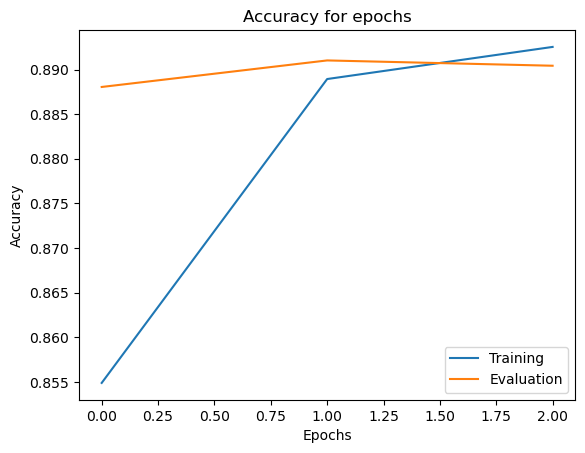

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Visualizing losses and validation:

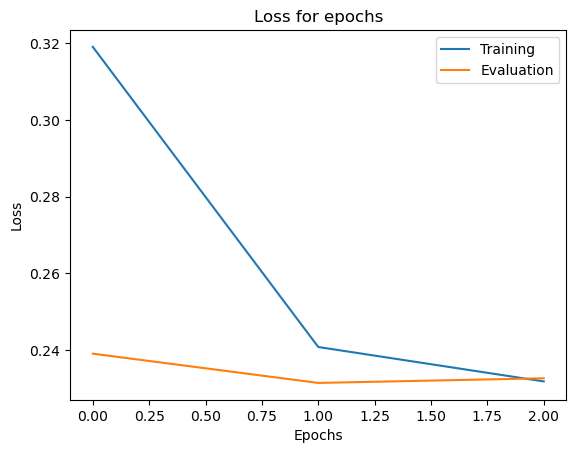

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Evaluation'])
plt.show()

## Evaluating the model with the test base:
### Accuracy and Loss

In [11]:
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'\nLOSS: >>>>> {loss_test}')
print(f'\nACCURACY: >>>>> {accuracy_test}')

232/232 [==============================] - 2s 10ms/step - loss: 0.2193 - accuracy: 0.9004

LOSS: >>>>> 0.21928657591342926

ACCURACY: >>>>> 0.9003505706787109


## Testing with test dataset 

In [12]:
test_data = model.predict(X_test)
prediction = np.argmax(test_data[0])
pred_true = y_test[0]

232/232 [==============================] - 3s 11ms/step


In [13]:
if prediction == 0:
    print('Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pediction: >>> Annual income greater than 50k >>>(>50k)')
if pred_true == 0:
    print('Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)')
else:
    print('Pred_True: >>> Annual income greater than 50k >>>(>50k)')
    

Pediction: >>> Annual income less than or equal to 50 >>>(<=50k)
Pred_True: >>> Annual income less than or equal to 50 >>>(<=50k)


## Saving model:

In [14]:
model.save('model.keras')